#1. Softmax Function (with Test Cases)

In [1]:
import numpy as np

def softmax(z):
    """
    Compute softmax probabilities for each row.
    """
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [2]:
def test_softmax():
    test_cases = [
        np.array([[0, 0, 0]]),
        np.array([[1, 2, 3]]),
        np.array([[1000, 1000, 1000]]),
        np.array([[-1000, -1000, -1000]]),
        np.array([[1, 0, -1]])
    ]

    for z in test_cases:
        result = softmax(z)
        assert np.allclose(result.sum(axis=1), 1)
        assert np.all(result >= 0)

    print("All tests passed for softmax!")

test_softmax()


All tests passed for softmax!


#2. Categorical Log-Loss Function

In [3]:
def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))


In [4]:
def test_loss_softmax():
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.1, 0.8, 0.1])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.8))

    y_true = np.array([1, 0, 0])
    y_pred = np.array([0.3, 0.4, 0.3])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.3))

    print("All tests passed for loss_softmax!")

test_loss_softmax()


All tests passed for loss_softmax!


#3. Cost Function (Average Cross-Entropy)

In [5]:
def cost_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


In [6]:
def test_cost_softmax():
    X = np.array([[1, 2], [2, 3], [3, 4]])
    y = np.array([[1, 0], [0, 1], [1, 0]])
    W = np.array([[1, -1], [-1, 1]])
    b = np.array([0, 0])

    expected = cost_softmax(X, y, W, b)
    assert np.isclose(cost_softmax(X, y, W, b), expected)

    print("All tests passed for cost_softmax!")

test_cost_softmax()


All tests passed for cost_softmax!


#4. Gradient Computation

In [7]:
def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b


In [8]:
def test_compute_gradient_softmax():
    X = np.array([[1, 2], [3, 4]])
    y = np.array([[1, 0], [0, 1]])
    W = np.array([[0.1, 0.2], [0.3, 0.4]])
    b = np.array([0.01, 0.02])

    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

    z = np.dot(X, W) + b
    y_pred = softmax(z)

    assert np.allclose(grad_W, np.dot(X.T, (y_pred - y)) / 2)
    assert np.allclose(grad_b, np.sum(y_pred - y, axis=0) / 2)

    print("Gradient tests passed!")

test_compute_gradient_softmax()


Gradient tests passed!


#5. Gradient Descent Training

In [9]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []

    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b

        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history


#6. Prediction Function

In [10]:
def predict_softmax(X, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)


In [11]:
def test_predict_softmax():
    X = np.random.rand(10, 5)
    W = np.random.rand(5, 3)
    b = np.random.rand(3)

    preds = predict_softmax(X, W, b)
    assert preds.shape == (10,)
    assert np.all(preds >= 0) and np.all(preds < 3)

    print("Prediction tests passed!")

test_predict_softmax()


Prediction tests passed!


#7. Evaluation Function

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return cm, precision, recall, f1


#8. Apply on IRIS Dataset

In [13]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [14]:
iris = load_iris()
X = iris.data
y = iris.target

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#9. Train Model

In [15]:
num_features = X_train.shape[1]
num_classes = y_train.shape[1]

W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)

W, b, cost_history = gradient_descent_softmax(
    X_train, y_train, W, b, alpha=0.1, n_iter=1000, show_cost=True
)


Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


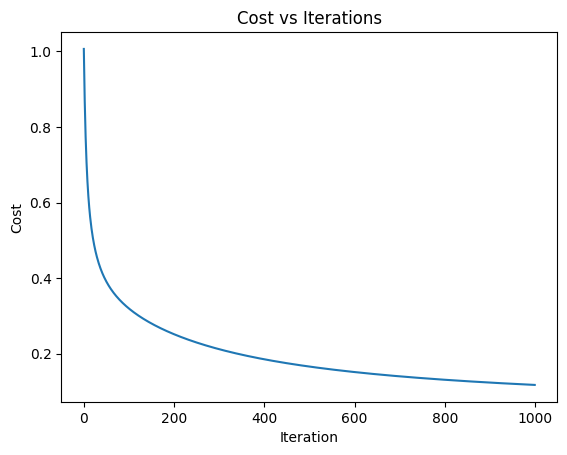

In [16]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()


#10. Model Evaluation

In [17]:
y_train_pred = predict_softmax(X_train, W, b)
y_test_pred = predict_softmax(X_test, W, b)

train_cost = cost_softmax(X_train, y_train, W, b)
test_cost = cost_softmax(X_test, y_test, W, b)

print("Train Cost:", train_cost)
print("Test Cost:", test_cost)


Train Cost: 0.11719197796193107
Test Cost: 0.15746616161033547


In [18]:
y_test_true = np.argmax(y_test, axis=1)
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 Score: 0.9333333333333333
